In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df =pd.read_csv("cyber crime(2017-2020).csv")

In [ ]:
df

,S. No,Category,State/UT,Personal Revenge,Anger,Fraud,Extortion,Causing Disrepute,Prank,Sexual Exploitation,...,Disrupt Public Service,Sale Purchase Illegal Drugs,Developing own Business,Spreading Piracy,Psycho or Pervert,Steal Information,Abetment to Suicide,Others,Total,Year
Index,,,,,,,,,,,,,,,,,,,,,
0,1,State,Andhra Pradesh,0.036697,0.019011,0.051466,0.061611,0.000000,0.000000,0.084254,...,0.028571,0.0,0.000000,0.001629,0.0,0.000000,0.0,0.054965,0.077454,0.0
1,2,State,Arunachal Pradesh,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000253,0.000083,0.0
2,3,State,Assam,0.376147,0.315589,0.004218,0.061611,0.041973,0.030936,0.299724,...,0.000000,0.0,0.000000,0.000000,0.0,0.036585,0.0,0.081560,0.093178,0.0
3,4,State,Bihar,0.018349,0.019011,0.034883,0.002844,0.000000,0.000000,0.022099,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.036023,0.0
4,5,State,Chhattisgarh,0.012232,0.011407,0.004130,0.003791,0.030430,0.013921,0.022099,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.010638,0.014226,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,32,Union Territories,Delhi,0.003058,0.015209,0.002021,0.014218,0.000000,0.000000,0.027624,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.026342,0.013977,1.0
140,33,Union Territories,Jammu & Kashmir,0.004587,0.015209,0.002900,0.008531,0.029381,0.001547,0.016575,...,0.028571,0.0,0.092105,0.000000,0.0,0.000000,0.0,0.003546,0.009983,1.0
141,34,Union Territories,Ladakh,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.028571,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000083,1.0


In [ ]:
df.describe()

,Personal Revenge,Anger,Fraud,Extortion,Causing Disrepute,Prank,Sexual Exploitation,Political Motives,Terrorist Activities (Total),Terrorist Activities - Terrorist Recruitment,...,Disrupt Public Service,Sale Purchase Illegal Drugs,Developing own Business,Spreading Piracy,Psycho or Pervert,Steal Information,Abetment to Suicide,Others,Total,Year
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,28.465278,17.902778,585.734266,43.319444,40.482517,15.666667,62.840278,7.145833,3.236111,0.125000,...,1.361111,0.312500,5.173611,6.118056,0.152778,1.256944,0.048611,174.333333,997.395833,2018.500000
std,81.495799,42.324805,1533.837980,121.939435,110.057445,109.885700,125.054207,17.350750,13.385090,0.835196,...,4.160438,1.421458,12.785662,51.318898,0.804875,7.966491,0.431777,496.502424,2145.379818,1.121936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000
25%,0.000000,0.000000,4.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,2017.750000
50%,4.000000,3.000000,47.500000,7.000000,3.000000,0.000000,16.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,173.000000,2018.500000
75%,19.750000,11.250000,391.000000,26.500000,28.250000,4.000000,62.000000,5.250000,0.250000,0.000000,...,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,141.500000,864.750000,2019.250000
max,654.000000,263.000000,11381.000000,1055.000000,953.000000,1293.000000,724.000000,108.000000,106.000000,7.000000,...,35.000000,13.000000,76.000000,614.000000,8.000000,82.000000,5.000000,3948.000000,12020.000000,2020.000000


In [ ]:
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 157
Number of columns: 26


In [ ]:
print("\nS.No      ColumnName                                        Datatype")
for k,(i,j) in enumerate(df.dtypes.items(),start=1):
  print(f'{k:<10}{i:<50}{j}')


S.No      ColumnName                                        Datatype
1         S. No                                             object
2         Category                                          object
3         State/UT                                          object
4         Personal Revenge                                  float64
5         Anger                                             float64
6         Fraud                                             float64
7         Extortion                                         float64
8         Causing Disrepute                                 float64
9         Prank                                             float64
10        Sexual Exploitation                               float64
11        Political Motives                                 float64
12        Terrorist Activities (Total)                      float64
13        Terrorist Activities - Terrorist Recruitment      float64
14        Terrorist Activities - Terrorist Fundin

In [ ]:
df.drop([29,37,38,68,76,77,78,108,116,117,146,155,156],axis=0,inplace=True)

In [ ]:
a=[i for i in range(144)]
df['Index']=a
df.set_index('Index',inplace=True)

In [ ]:
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 144
Number of columns: 26


<ipython-input-63-b799a93c9b33>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


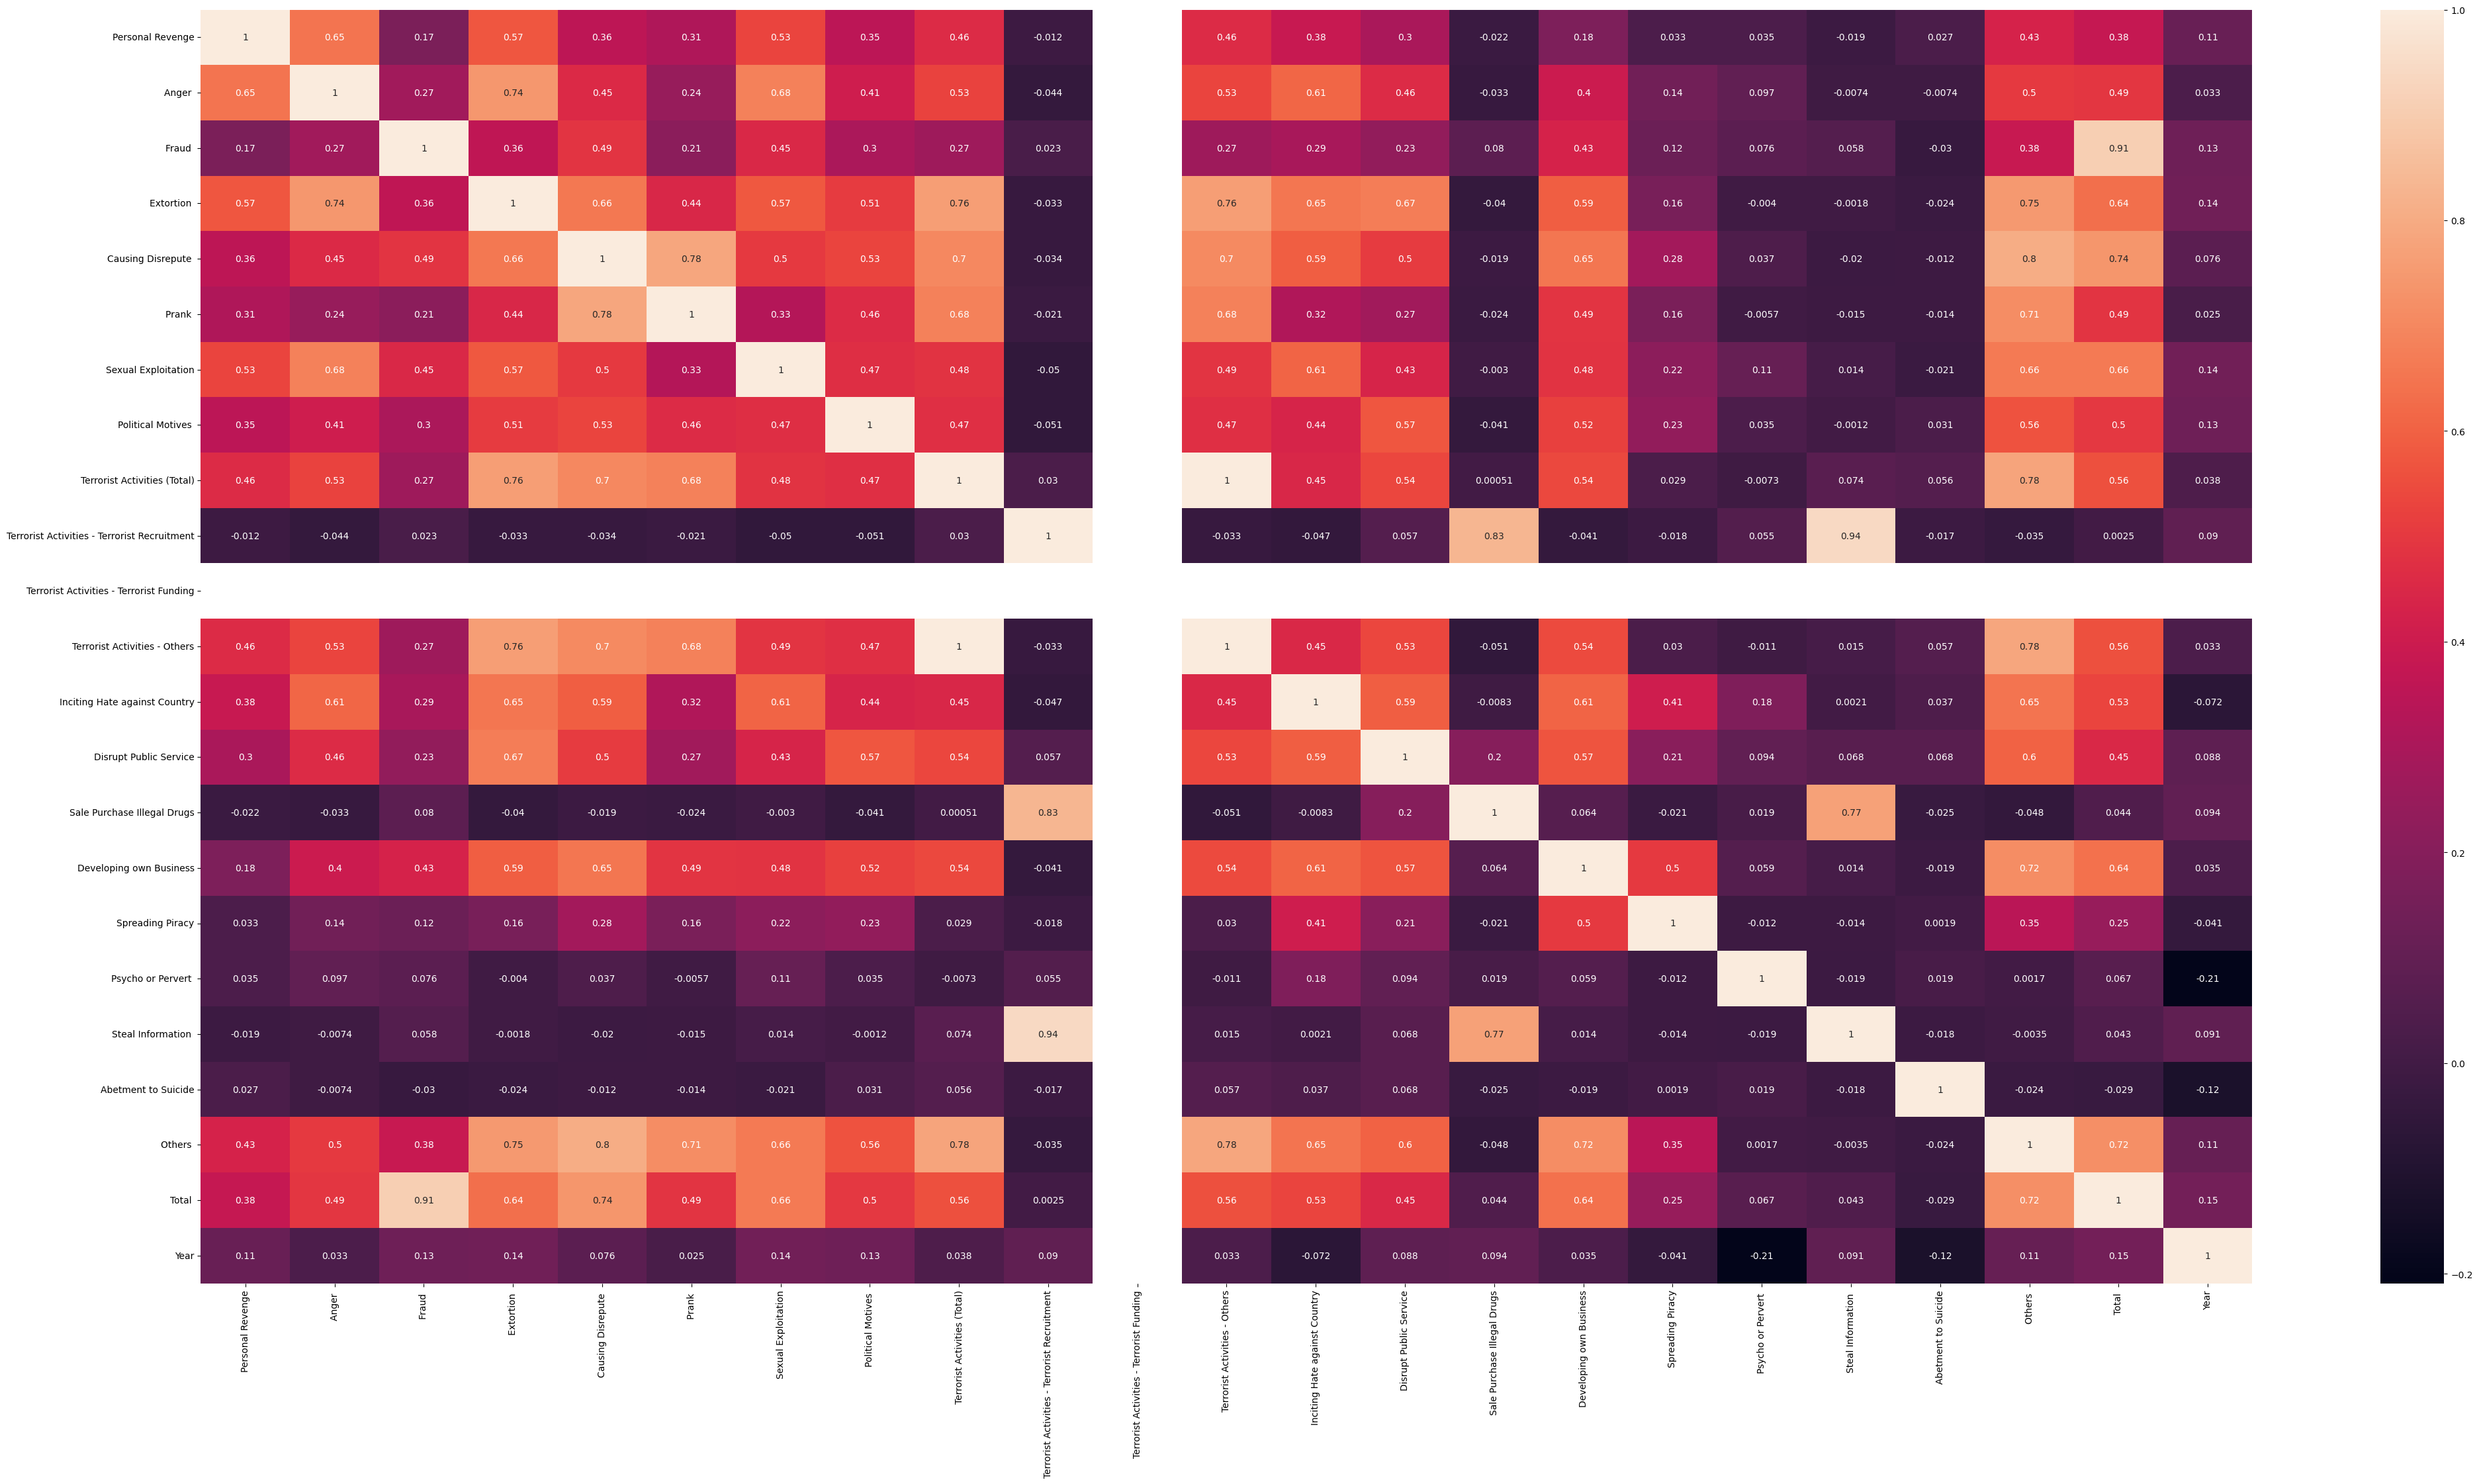

In [ ]:
plt.figure(figsize=(50,25))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
num = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(100,100))
sns.boxplot(df[num])

<Axes: >

<Axes: xlabel='Index'>

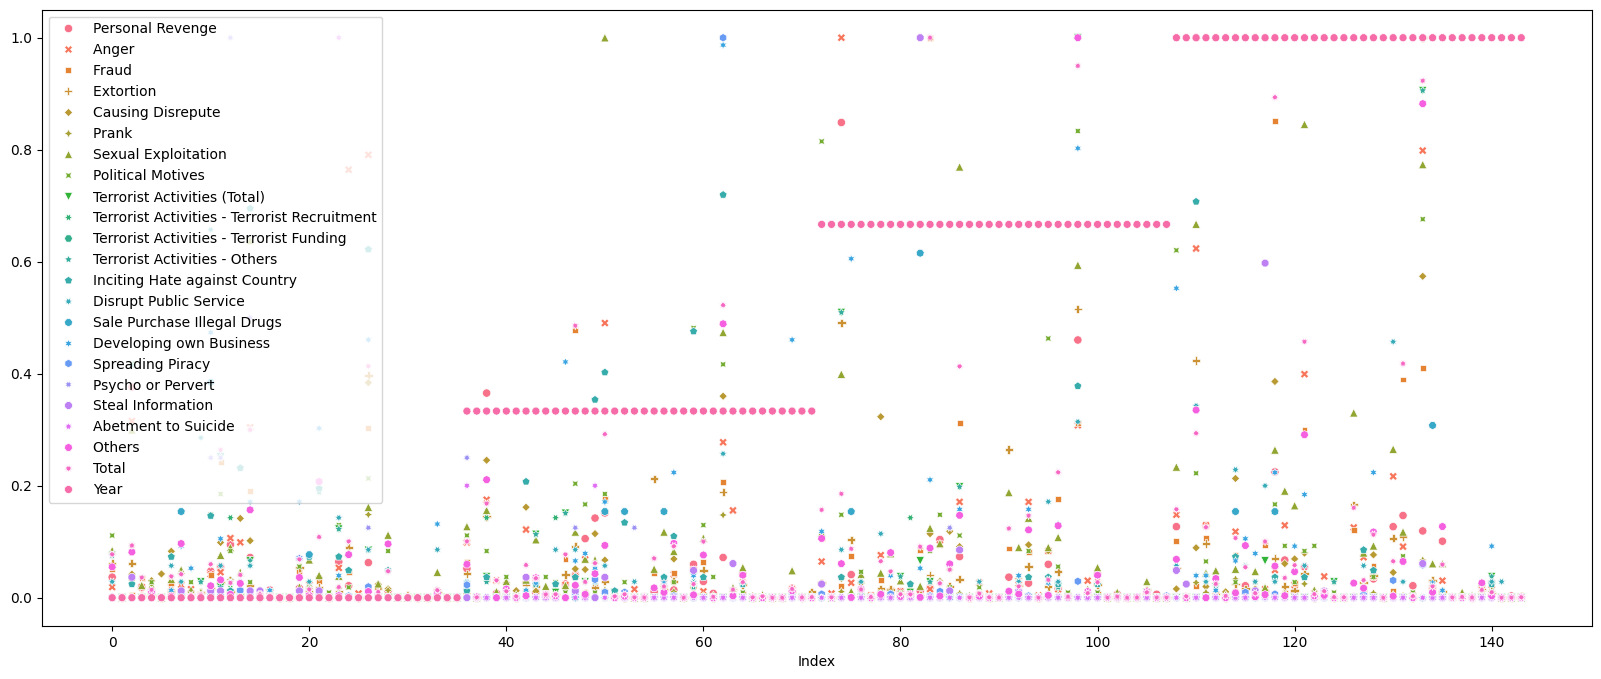

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(df[num])

In [ ]:
num = df.select_dtypes(include=[np.number])
mean = num.mean()
median = num.median()

quartiles = num.quantile([0.25, 0.5, 0.75])

min_val = num.min()
max_val = num.max()

mode = df.mode()

print("\nMean:\n\n", mean)
print("\nMedian:\n\n", median)
print("\nQuartiles:\n\n", quartiles)
print("\nMin:\n\n", min_val)
print("\nMax:\n\n", max_val)
print("\nMode:\n\n", mode)


Mean:

 Personal Revenge                                0.043525
Anger                                           0.068071
Fraud                                           0.051466
Extortion                                       0.041061
Causing Disrepute                               0.042479
Prank                                           0.012117
Sexual Exploitation                             0.086796
Political Motives                               0.066165
Terrorist Activities (Total)                    0.030529
Terrorist Activities - Terrorist Recruitment    0.017857
Terrorist Activities - Terrorist Funding        0.000000
Terrorist Activities - Others                   0.029350
Inciting Hate against Country                   0.054031
Disrupt Public Service                          0.038889
Sale Purchase Illegal Drugs                     0.024038
Developing own Business                         0.068074
Spreading Piracy                                0.009964
Psycho or Pervert     

In [ ]:
numeric = df.select_dtypes(include=np.number)

for i in numeric.columns:
  column = numeric[i]

  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)

  IQR = Q3 - Q1

  lower_threshold = Q1 - 1.5 * IQR
  upper_threshold = Q3 + 1.5 * IQR

  outliers = column[(column < lower_threshold) | (column > upper_threshold)]

  print("\n\nOutliers of",i,":\n")
  print(outliers)



Outliers of Personal Revenge :

Index
2      246.0
12      62.0
38     239.0
48      69.0
49      93.0
50      99.0
74     555.0
84      68.0
98     301.0
108     83.0
110    654.0
111     84.0
118    147.0
130     83.0
131     96.0
133     78.0
135     66.0
Name: Personal Revenge, dtype: float64


Outliers of Anger  :

Index
2       83.0
14      80.0
24     201.0
26     208.0
38      46.0
42      32.0
50     129.0
62      73.0
63      41.0
74     263.0
86      45.0
93      45.0
98      81.0
108     39.0
110    164.0
111     34.0
114     31.0
119     34.0
121    105.0
126     33.0
130     57.0
133    210.0
Name: Anger , dtype: float64


Outliers of Fraud  :

Index
11      2764.0
14      2171.0
26      3450.0
47      5441.0
50      1998.0
62      2351.0
72      1211.0
82       964.0
83     11381.0
86      3551.0
91      1000.0
93       938.0
96      2013.0
98      3549.0
108     1149.0
111     1218.0
117     1069.0
118     9680.0
121     3413.0
126     1380.0
131     4436.0
133     46

In [ ]:
print(df.isna().sum())

S. No                                           0
Category                                        0
State/UT                                        0
Personal Revenge                                0
Anger                                           0
Fraud                                           1
Extortion                                       0
Causing Disrepute                               1
Prank                                           0
Sexual Exploitation                             0
Political Motives                               0
Terrorist Activities (Total)                    0
Terrorist Activities - Terrorist Recruitment    0
Terrorist Activities - Terrorist Funding        0
Terrorist Activities - Others                   0
Inciting Hate against Country                   0
Disrupt Public Service                          0
Sale Purchase Illegal Drugs                     0
Developing own Business                         0
Spreading Piracy                                0


In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns
for i in numeric_columns:
    df[i] = df[i].fillna(df[i].mean())
categorical_columns = df.select_dtypes(include='object').columns
for i in categorical_columns:
    df[i] = df[i].fillna(df[i].mode()[0])

In [ ]:
print(df.isna().sum())

S. No                                           0
Category                                        0
State/UT                                        0
Personal Revenge                                0
Anger                                           0
Fraud                                           0
Extortion                                       0
Causing Disrepute                               0
Prank                                           0
Sexual Exploitation                             0
Political Motives                               0
Terrorist Activities (Total)                    0
Terrorist Activities - Terrorist Recruitment    0
Terrorist Activities - Terrorist Funding        0
Terrorist Activities - Others                   0
Inciting Hate against Country                   0
Disrupt Public Service                          0
Sale Purchase Illegal Drugs                     0
Developing own Business                         0
Spreading Piracy                                0


In [ ]:
# m=MinMaxScaler()
# df[numeric_columns]=m.fit_transform(df[numeric_columns])
# print(df)

      S. No           Category           State/UT  Personal Revenge    Anger   \
Index                                                                           
0         1              State     Andhra Pradesh          0.036697  0.019011   
1         2              State  Arunachal Pradesh          0.000000  0.000000   
2         3              State              Assam          0.376147  0.315589   
3         4              State              Bihar          0.018349  0.019011   
4         5              State       Chhattisgarh          0.012232  0.011407   
...     ...                ...                ...               ...       ...   
139      32  Union Territories              Delhi          0.003058  0.015209   
140      33  Union Territories    Jammu & Kashmir          0.004587  0.015209   
141      34  Union Territories             Ladakh          0.000000  0.000000   
142      35  Union Territories        Lakshadweep          0.003058  0.000000   
143      36  Union Territori

In [ ]:
dictionary={}
for i in range(len(df)):
  if df.iloc[i,25]==2020:
    if df.iloc[i,1]=='State':
      dictionary[df.iloc[i,2]]=df.iloc[i,24]
print(dictionary)

{'Andhra Pradesh': 1899.0, 'Arunachal Pradesh': 30.0, 'Assam': 3530.0, 'Bihar': 1512.0, 'Chhattisgarh': 297.0, 'Goa': 40.0, 'Gujarat': 1283.0, 'Haryana': 656.0, 'Himachal Pradesh': 98.0, 'Jharkhand': 1204.0, 'Karnataka': 10741.0, 'Kerala': 426.0, 'Madhya Pradesh': 699.0, 'Maharashtra': 5496.0, 'Manipur': 79.0, 'Meghalaya': 142.0, 'Mizoram': 13.0, 'Nagaland': 8.0, 'Odisha': 1931.0, 'Punjab': 378.0, 'Rajasthan': 1354.0, 'Sikkim': 0.0, 'Tamil Nadu': 782.0, 'Telangana': 5024.0, 'Tripura': 34.0, 'Uttar Pradesh': 11097.0, 'Uttarakhand': 243.0, 'West Bengal': 712.0}


In [ ]:
m = -1
s = ''
# for i,j in dictionary.items():
#   if j>m:
#     m = j
#     s = i
print('State that has the highest cases in the year 2020 :',s)

d = sorted(dictionary.values(), reverse=True)
for i, j in dictionary.items():
  if j == d[0]:
    s = i

print('State that has the highest cases in the year 2020 :',s)

State that has the highest cases in the year 2020 : 
State that has the highest cases in the year 2020 : Uttar Pradesh


([<matplotlib.patches.Wedge at 0x7808dc6a58d0>,
 [Text(0.6013243939329421, 0.921091186181466, '2019 cases : 151.0'),
  Text(-0.6013244801717206, -0.9210911298814088, '2020 cases : 327.0')])

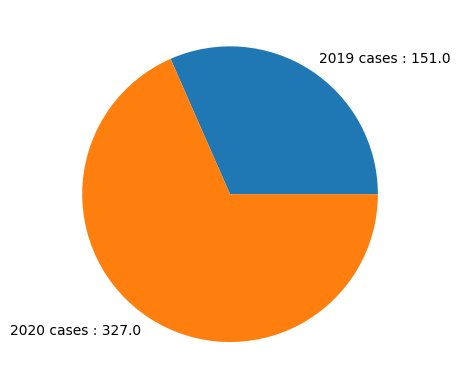

In [ ]:
mdc={2019:0,2020:0}

for i in range(len(df)):
  if df.iloc[i,1]!='State':
    if df.iloc[i,25]==2019:
      mdc[2019]+=df.iloc[i,24]
    elif df.iloc[i,25]==2020:
      mdc[2020]+=df.iloc[i,24]

k=[mdc[2019],mdc[2020]]
plt.pie(k,labels=[f'2019 cases : {k[0]}',f'2020 cases : {k[1]}'])

In [ ]:
encoded = pd.get_dummies(df, columns=['Category','State/UT'])

l = LabelEncoder()
X = encoded.drop(columns=['Year'], axis=1)
y = encoded['Year']

In [ ]:
L = l.fit_transform(y)
s = SelectKBest(score_func=chi2, k=3)
s.fit_transform(X, L)
score = pd.Series(s.scores_, index=X.columns)
print(score)

S. No                     5.503557e-02
Personal Revenge          6.596951e-01
Anger                     4.368110e-01
Fraud                     9.583863e-01
Extortion                 9.370721e-01
                              ...     
State/UT_Telangana        1.972152e-31
State/UT_Tripura          1.972152e-31
State/UT_Uttar Pradesh    1.972152e-31
State/UT_Uttarakhand      1.972152e-31
State/UT_West Bengal      1.972152e-31
Length: 67, dtype: float64


In [ ]:
top3_features = score.nlargest(3)
print("Top 3 features:")
print(top3_features)

Top 3 features:
Category_Union Territories    24.0
Category_UT                   21.0
Category_Union Territory      14.0
dtype: float64


In [ ]:
df['bins']=pd.qcut(df['Year'], 20 , duplicates='drop')
print('\nBining\n',df['Year'])
bin_means=df.groupby('bins')['Year'].mean()
df['Year']=df['bins'].map(bin_means)
df.drop('bins',axis=1,inplace=True)
print('\n\nAfter Binning\n',df['Year'])


Bining
 Index
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
139    1.0
140    1.0
141    1.0
142    1.0
143    1.0
Name: Year, Length: 144, dtype: float64


After Binning
 Index
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
139    1.0
140    1.0
141    1.0
142    1.0
143    1.0
Name: Year, Length: 144, dtype: float64


In [ ]:
X1,X2,y1,y2 = train_test_split(X,y,train_size=0.4,random_state=42)

In [ ]:
d=DecisionTreeClassifier(max_depth=10000)
d.fit(X1,y1)
ypre=d.predict(X2)
print(accuracy_score(ypre,y2))

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values